# Installing Specific Modules

In [1]:
!pip install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn

Requirement already up-to-date: jupyter in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (1.0.0)
Requirement already up-to-date: matplotlib in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (3.2.1)
Requirement already up-to-date: numpy in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (1.18.3)
Requirement already up-to-date: pandas in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (1.0.3)
Requirement already up-to-date: scipy in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (1.4.1)
Requirement already up-to-date: scikit-learn in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (0.22.2.post1)
Requirement already up-to-date: openpyxl in c:\users\cw\appdata\local\programs\python\python37-32\lib\site-packages (3.0.3)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Importing all relevant libraries

In [2]:
import pandas as pd
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
import scipy

# Get The DATA

### 1. Loading Data into our Notebook

In [3]:
def load(train,test):
    spotify_train = pd.read_csv(train)
    spotify_test = pd.read_csv(test)
    return spotify_train,spotify_test
spotify_train,spotify_test = load('CS98XRegressionTrain.csv','CS98XRegressionTest.csv')

### 2. Copying the labels(predictions)

In [4]:
spotify_labels = spotify_train['pop']
spotify_labels

0      44
1      37
2      77
3      67
4      63
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop, Length: 453, dtype: int64

#  Discover and visualize the data to gain insights

### 1. Take a Quick Look at the Data Structure

In [5]:
pd.DataFrame(spotify_train)

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [6]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 47.8+ KB


In [7]:
spotify_train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


### 2. Visualize Data

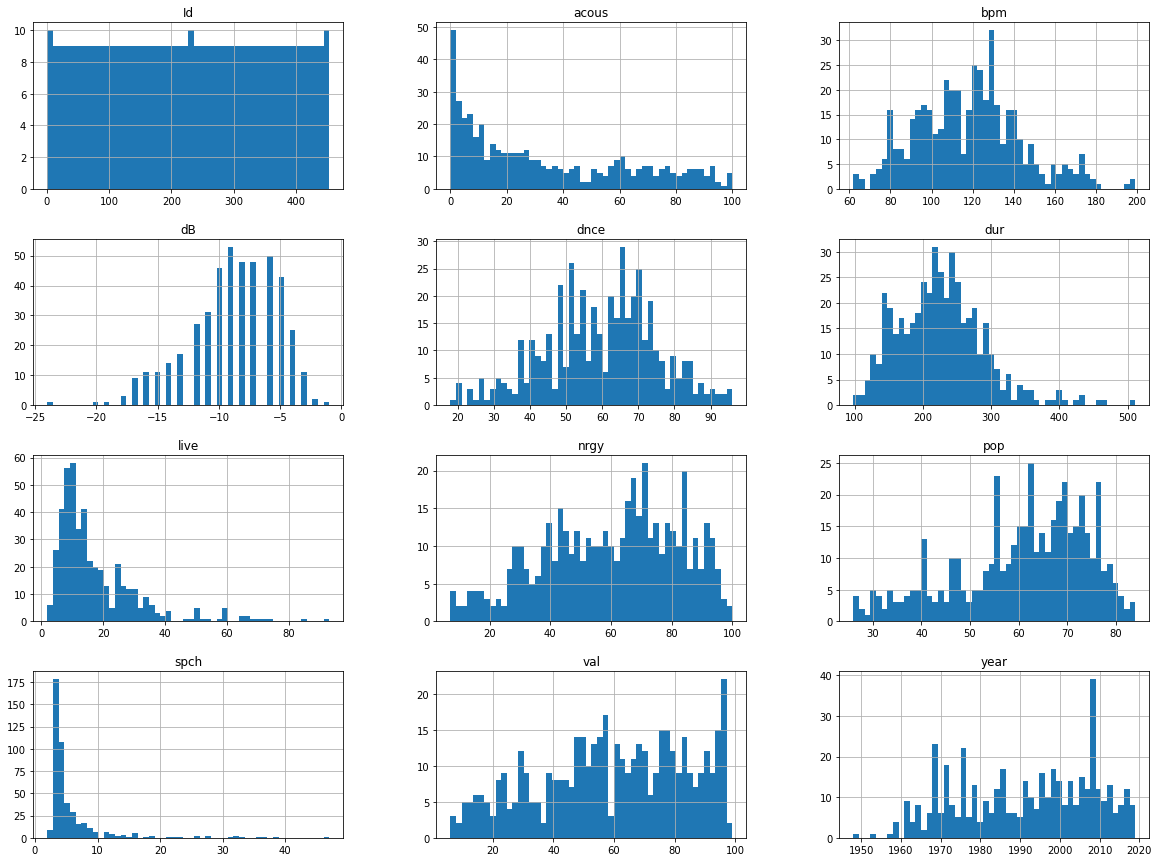

In [8]:
spotify_train.hist(bins=50, figsize=(20,15)) ## Histogram for each Numerical Feature
plt.show()

# Prepare the Data for Machine Learning Algorithms

### 1. Data Cleaning

In [9]:
spotify_train_copy = spotify_train.drop(["Id","title","artist","top genre","year","pop"],axis = 1)

In [10]:
pd.DataFrame(spotify_train_copy)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
1,114,44,53,-8,13,47,139,49,3
2,105,36,63,-9,13,67,245,11,3
3,170,28,47,-16,13,33,232,25,3
4,121,47,56,-8,15,40,193,45,3
...,...,...,...,...,...,...,...,...,...
448,80,22,18,-17,10,16,214,92,4
449,148,81,53,-13,23,96,147,50,3
450,168,55,73,-8,20,61,289,23,14
451,165,87,64,-5,6,88,191,5,8


### 2. Appliying Pipeline

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

spotify_prepared=num_pipeline.fit_transform(spotify_train_copy)
pd.DataFrame(spotify_prepared)

,0,1,2,3,4,5,6,7,8
0,-0.452169,-1.310624,-0.941668,0.234142,-0.344348,-1.283649,-1.197460,1.424453,-0.479767
1,-0.174511,-0.724531,-0.424450,0.234142,-0.344348,-0.508542,-1.370145,0.543019,-0.479767
2,-0.531500,-1.085204,0.222073,-0.045716,-0.344348,0.307359,0.293907,-0.745230,-0.479767
3,2.046756,-1.445876,-0.812364,-2.004725,-0.344348,-1.079673,0.089825,-0.270612,-0.479767
4,0.103148,-0.589278,-0.230493,0.234142,-0.199578,-0.794108,-0.522420,0.407414,-0.479767
...,...,...,...,...,...,...,...,...,...
448,-1.523137,-1.716381,-2.687280,-2.284583,-0.561503,-1.773190,-0.192750,2.000775,-0.299406
449,1.174116,0.943582,-0.424450,-1.165150,0.379502,1.490416,-1.244556,0.576921,-0.479767
450,1.967425,-0.228605,0.868596,0.234142,0.162347,0.062588,0.984645,-0.338414,1.504199
451,1.848429,1.214086,0.286725,1.073717,-0.851043,1.164055,-0.553817,-0.948637,0.422036


# Select a model and train it

### 1. Selecting a model and training it

In [12]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#reg = linear_model.LinearRegression(copy_X=True,fit_intercept=False,normalize=True)
#reg = linear_model.ARDRegression()
#reg = RandomForestRegressor(max_features=6, n_estimators =30)
#reg = DecisionTreeRegressor(random_state=42)
# #reg = RandomForestRegressor(max_features=3, n_estimators=150)
# #reg2 = RandomForestRegressor(max_features=3, n_estimators=150)
#reg = SVR(kernel="linear")

reg = RandomForestRegressor(max_features=3, n_estimators=150) #bestt working
reg.fit(spotify_prepared,spotify_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 2. Evaluating model on Training set and Checking For RMSE

In [13]:
from sklearn.metrics import mean_squared_error

spotify_predictions = reg.predict(spotify_prepared)
mse = mean_squared_error(spotify_labels, spotify_predictions)
rmse = np.sqrt(mse)
print(rmse)

4.066536433818612


### 3. Checking Cross Validation Scores

In [14]:
from sklearn.model_selection import cross_val_score

def c_v_s(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [15]:
scores = cross_val_score(reg,spotify_prepared,spotify_labels,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
c_v_s(rmse_scores)

Scores: [11.81989104 11.19489696  9.8710545  10.04446883 11.791106   11.76499843
 10.62912737 10.58912295 12.27785034  9.88019043]
Mean: 10.986270685065055
Standard deviation: 0.8544115915097426


# Fine Tune Your Model

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=5),
    }

rnd_search = RandomizedSearchCV(reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(spotify_prepared, spotify_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=3,
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=150,
                                   

In [17]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.015211789104631 {'max_features': 3, 'n_estimators': 180}
11.32383084020472 {'max_features': 1, 'n_estimators': 15}
11.180538975964572 {'max_features': 3, 'n_estimators': 72}
11.320254196347527 {'max_features': 1, 'n_estimators': 21}
10.942574502745387 {'max_features': 3, 'n_estimators': 122}
11.042268181408682 {'max_features': 3, 'n_estimators': 75}
11.070772887560734 {'max_features': 3, 'n_estimators': 88}
10.968412811987138 {'max_features': 1, 'n_estimators': 100}
11.02862195391082 {'max_features': 4, 'n_estimators': 152}
11.023564737453347 {'max_features': 3, 'n_estimators': 150}


In [18]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.07492544, 0.11732875, 0.09451747, 0.08777056, 0.06449933,
       0.08010681, 0.27362603, 0.16400082, 0.04322479])

In [19]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])
top_k_feature_indices = indices_of_top_k(feature_importances, 3)
top_k_feature_indices

array([1, 6, 7], dtype=int32)

In [20]:
all_attribs = ["bpm","nrgy","dnce","dB","live","val","dur","acous","spch"]
np.array(all_attribs)[top_k_feature_indices]

array(['nrgy', 'dur', 'acous'], dtype='<U5')

## Working On Test Data

In [21]:
spotify_test_copy = spotify_test.drop(["Id","title","artist","top genre","year"],axis = 1)
pd.DataFrame(spotify_test_copy)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,154,93,65,-3,75,74,213,1,18
1,161,39,30,-15,11,14,292,26,3
2,64,46,27,-7,12,18,179,38,3
3,127,92,71,-9,37,53,216,6,4
4,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...
109,125,57,61,-8,38,76,209,3,47
110,130,89,67,-6,10,80,215,4,3
111,84,58,78,-7,14,76,253,43,27
112,127,97,72,-5,12,73,287,6,14


In [22]:
spotify_test_prepared=num_pipeline.transform(spotify_test_copy)
pd.DataFrame(spotify_test_prepared)

,0,1,2,3,4,5,6,7,8
0,1.412108,1.484591,0.351377,1.633434,4.143519,0.592924,-0.208448,-1.084243,2.225641
1,1.689767,-0.949951,-1.911453,-1.724866,-0.489118,-1.854780,1.031741,-0.236710,-0.479767
2,-2.157784,-0.634362,-2.105410,0.514000,-0.416733,-1.691599,-0.742201,0.170105,-0.479767
3,0.341141,1.439507,0.739291,-0.045716,1.392891,-0.263772,-0.161352,-0.914736,-0.299406
4,-0.134845,-0.634362,-0.230493,-0.885291,0.234732,-1.038878,-1.150364,-0.507921,-0.479767
...,...,...,...,...,...,...,...,...,...
109,0.261810,-0.138437,0.092768,0.234142,1.465276,0.674514,-0.271243,-1.016440,7.456095
110,0.460137,1.304255,0.480682,0.793859,-0.561503,0.837695,-0.177051,-0.982539,-0.479767
111,-1.364475,-0.093353,1.191857,0.514000,-0.271963,0.674514,0.419496,0.339612,3.848885
112,0.341141,1.664928,0.803943,1.073717,-0.416733,0.552129,0.953248,-0.914736,1.504199


# Evaluate Your System on the Test Set

In [23]:
final_predictions = reg.predict(spotify_test_prepared)
final_predictions

array([68.84      , 67.58      , 54.6       , 60.71333333, 54.46      ,
       65.88666667, 56.08666667, 39.34      , 66.40666667, 62.13333333,
       60.16      , 64.32666667, 59.74666667, 64.76      , 65.54      ,
       64.12666667, 61.72666667, 64.76      , 67.12666667, 64.97333333,
       52.99333333, 58.02      , 62.77333333, 44.98666667, 52.24666667,
       68.66      , 60.40666667, 56.20666667, 46.79333333, 68.66666667,
       67.49333333, 50.46      , 67.3       , 67.81333333, 65.14666667,
       70.66666667, 62.54      , 56.04      , 62.42666667, 67.16666667,
       67.75333333, 63.02      , 65.76      , 42.82666667, 64.02666667,
       61.78666667, 62.13333333, 58.70666667, 60.36      , 62.40666667,
       46.72666667, 67.51333333, 58.3       , 48.16666667, 60.48      ,
       60.85333333, 66.3       , 51.85333333, 67.79333333, 45.76666667,
       64.28666667, 66.64      , 67.74      , 67.26666667, 70.19333333,
       65.08      , 67.28666667, 61.09333333, 63.08      , 59.18

In [24]:
final_predictions.shape
df = pd.DataFrame(spotify_test['Id'])
df['pop'] = final_predictions

In [25]:
df

,Id,pop
0,454,68.840000
1,455,67.580000
2,456,54.600000
3,457,60.713333
4,458,54.460000
...,...,...
109,563,67.026667
110,564,61.873333
111,565,60.760000
112,566,63.360000


# Rounding Labels(as labels needed as integers)

In [26]:
df['pop']=df['pop'].round()
df['pop']=df['pop'].astype(int)
df

,Id,pop
0,454,69
1,455,68
2,456,55
3,457,61
4,458,54
...,...,...
109,563,67
110,564,62
111,565,61
112,566,63


# Exporting Final Result to CSV file

In [27]:
df.to_csv (r'E:\Machine Learning\handson-ml-master\export_dataframe.csv', index = False, header=True)